# **Notebook: Linear regression using gradient descent**

In this notebook, you will implement a linear regression model by using gradient descent only using `numpy`. In Hand-in assignment 1, you will later extend this code to a full neural network.

**Note:** A linear regression problem can also be solved analytically using the normal equations. However, for the purpose of it being an initial code that you can extend in Hand-in assignment 1, you should solve it here using gradient descent.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Load the dataset `'Auto.csv'`. The dataset:  

**Description**:  Gas mileage, horsepower, and other information for 392 vehicles.  
**Format**: A data frame with 392 observations on the following 9 variables.  

- `mpg`: miles per gallon  
- `cylinders`: Number of cylinders between 4 and 8
- `displacement`: Engine displacement (cu. inches)
- `horsepower`: Engine horsepower
- `weight`: Vehicle weight (lbs.)
- `acceleration`: Time to accelerate from 0 to 60 mph (sec.)
- `year`: Model year (modulo 100)
- `origin`: Origin of car (1. American, 2. European, 3. Japanese)
- `name`: Vehicle name  
*The orginal data contained 408 observations but 16 observations with missing values were removed.*


In [19]:
# The null values are '?' in the dataset. `na_values="?"` recognize the null values.
# There are null values that will mess up the computation. Easier to drop them by `dropna()`.

# import data
url = 'https://uu-sml.github.io/course-sml-public/data/auto.csv'
auto = pd.read_csv(url, na_values='?', dtype={'ID': str}).dropna().reset_index()

Familiarize yourself with the dataset using `auto.info()`.

In [20]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         392 non-null    int64  
 1   mpg           392 non-null    float64
 2   cylinders     392 non-null    int64  
 3   displacement  392 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        392 non-null    int64  
 6   acceleration  392 non-null    float64
 7   year          392 non-null    int64  
 8   origin        392 non-null    int64  
 9   name          392 non-null    object 
dtypes: float64(4), int64(5), object(1)
memory usage: 30.8+ KB


We will train a linear regression model with `mpg` as output and the remining features as input.


In [21]:
# Extract relevant data features
x_train = auto[['cylinders','displacement','horsepower','weight', 'acceleration','year','origin']].values
y_train = auto[['mpg']].values


Now we are ready to set up the model! The linear regression model is expressed as
\begin{align*}
y & = f[\mathbf x, \boldsymbol \phi] \\
  & = \sum_{j=1}^{D_i} \omega_j x_j +   \beta \\
  & = \boldsymbol \omega^T \mathbf x + \beta
\end{align*}
where the weights $\boldsymbol\omega$ and the bias $\beta$ are the parameters $\boldsymbol \phi =\{ \boldsymbol\omega, \beta\}$ of the model.

First we initialize all parameters. The weights $\boldsymbol\omega$ are stored in  "weights" and the bias $\beta$ is stored in "bias". We'll just choose the weights and bias to be equal to zero for now.

In [22]:
def initialize(D_i):
    # Arguments
    # D_i - Input dimension

    # Return
    # weights, bias -- Weights and bias for the model

    weights = np.zeros((D_i,1))
    bias = np.zeros((1,1))

    return weights, bias

Now let's run our random model! We will evaluate the output for all inputs in one go by vectorizing the code. This reads
\begin{align*}
 \begin{bmatrix}
  f[\mathbf x_1,\boldsymbol\phi] \\
 \vdots \\
 f[\mathbf x_I,\boldsymbol\phi]
 \end{bmatrix}=
 \underbrace{
 \begin{bmatrix}
	 \mathbf x_1^T \\
	 \vdots \\
	 \mathbf x_{I}^T \\
 \end{bmatrix}
 }_{\text{net_input}}
 \boldsymbol \omega + \beta
 \end{align*}

 where $\beta$ is added to each row (called broadcasting in Python).

In [28]:
def forward_pass(net_input, weights, bias):
    # Arguments
    # net_input -- Input X for the model
    # weights, bias -- Weights and bias for the model
    #
    # Return
    # net_output -- Output y of the model

    # TODO -- Replace the line below
    # net_output = 0
    net_output = np.dot(net_input, weights) + bias
    return net_output

Now let's define a cost function.  For this, we'll just use the least squares loss function. We'll also write a function to compute d_cost_d_output

In [29]:
def least_squares_cost(net_output, y):
    # Arguments
    # net_output -- Output for the model
    # y -  true label vector, one-hot encoded
    #
    # Return
    # net_output -- Output y of the model

    I = y.shape[0] # Number of data points
    cost = np.sum((net_output-y) * (net_output-y))/I
    # cost = np.sum((net_output - y) ** 2) / (2 * I)
    return cost

def d_cost_d_output(net_output, y):
    # Arguments
    # net_output -- Output for the model
    # y -  true label vector, one-hot encoded
    #
    # Return
    # d_output -- derivatives of the cost with respect to output of the model

    I = y.shape[0] # Number of data points
    # TODO Calculate the derivatives of the cost with respect to output of the model, see first item of Preparatory exercise 2.2 and 2.3
    # REPLACE THIS LINE
    # d_output =  np.zeros_like(net_output)
    d_output = 2*(net_output - y) / I

    return d_output

Now let's compute the gradient of the loss with respect to the parameters. To do that we need to do both a forward pass and then a backward pass through the model. We have already done the forward pass.  Let's compute the backward pass.

In [30]:
# Main backward pass routine
def backward_pass(weights, bias, net_input, net_output, y):
    # Arguments
    # weights, bias -- Weights and bias for the model
    # net_input, net_output -- Input and output for the model
    # y -  true label vector, one-hot encoded
    #
    # Return
    # dl_dweights, dl_dbias -  derivative of cost with respect to weights andb bias

    # Compute derivatives of the cost with respect to the network output
    dl_df = np.array(d_cost_d_output(net_output,y))

    # TODO Calculate the derivatives of the cost with respect to the bias using preparatpry exercise 2.3
    # REPLACE THIS LINE
    # dl_dbias = np.zeros_like(bias)
    dl_dbias = np.sum(dl_df, axis=0, keepdims=True)

    # TODO Calculate the derivatives of the cost with respect to the weights using preparatpry exercise 2.3
    # REPLACE THIS LINE
    # dl_dweights = np.zeros_like(weights)
    dl_dweights = np.dot(net_input.T, dl_df)

    return dl_dweights, dl_dbias

We can check we got this right using a trick known as **finite differences**.  If we evaluate the function and then change one of the parameters by a very small amount and normalize by that amount, we get an approximation to the gradient, so:

\begin{align}
\frac{\partial L}{\partial \beta}&\approx & \frac{L[\beta+\delta, \omega_1,\dots,\omega_{D_i}]-L[\beta, \omega_1,\dots,\omega_{D_i}]}{\delta}\\
\frac{\partial L}{\partial \omega_{1}}&\approx & \frac{L[\beta, \omega_1+\delta,\dots,\omega_{D_i}]-L[\beta, \omega_1,\dots,\omega_{D_i}]}{\delta}\\
&\,\, \vdots  \\
\frac{\partial L}{\partial \omega_{D_i}}&\approx & \frac{L[\beta, \omega_1,\dots,\omega_{D_i}+\delta]-L[\beta, \omega_1,\dots,\omega_{D_i}]}{\delta}
\end{align}

We can't do this when there are many parameters;  for a million parameters, we would have to evaluate the loss function one million plus one times, and usually computing the gradients directly is much more efficient.



In [39]:
# Compute the gradient using your function
# Sefine a random
D_i = 5
I = 10
net_input = np.random.normal(size=(I,D_i))
y = np.random.normal(size=(I,1))
weights = np.random.normal(size=(D_i,1))
bias = np.random.normal()
# D_i = 5
# I = 10
# net_input = np.random.normal(size=(I, D_i))
# y = np.random.normal(size=(I, 1))
# weights = np.random.normal(size=(D_i, 1))
# bias = np.random.normal()

# Compute gradient with forward and backward pass
net_output = forward_pass(net_input, weights, bias)
dl_dweights, dl_dbias = backward_pass(weights, bias, net_input, net_output, y)

# Approximate the gradients with finite differences
delta = 0.0001

# Start with bias
bias_delta =  bias + delta
net_output_delta = forward_pass(net_input, weights, bias_delta)
dl_dbias_est = (least_squares_cost(net_output_delta, y)-least_squares_cost(net_output, y))/delta

print("Your derivative of bias")
print(dl_dbias)

print("Approximated derivative of bias")
print(dl_dbias_est)


# Now the weights
dl_dweights_est  = np.zeros_like(dl_dweights)

for j in range(D_i):
    weights_delta = np.array(weights)
    weights_delta[j] += delta
    net_output_delta = forward_pass(net_input, weights_delta, bias)
    dl_dweights_est[j] = (least_squares_cost(net_output_delta, y)-least_squares_cost(net_output, y))/delta

print("Your derivative of weights")
print(dl_dweights)

print("Approximated derivative of weights")
print(dl_dweights_est)

Your derivative of bias
[[1.78053969]]
Approximated derivative of bias
1.780639689261676
Your derivative of weights
[[ 0.83012607]
 [ 6.81889056]
 [ 3.17479181]
 [-2.50057254]
 [ 8.76473984]]
Approximated derivative of weights
[[ 0.83020053]
 [ 6.81915613]
 [ 3.1749072 ]
 [-2.50053451]
 [ 8.76494232]]


Once we have checked that the derivatives match we can proceed.

We also need a function for how to update the parameters.

In [32]:
def update_parameters(weights, bias, dl_dweights, dl_dbias, alpha):
  # Arguments
  # weights, bias -- Weights and bias for the model
  # dl_dweights, dl_dbias -  derivative of loss with respect to weights and bias
  # alpha -  learning rate
  #
  # Return
  # weights, bias -- Updated weights and bias for the model

  # TODO -- Replace the lines below
  # weights = weights
  weights -= alpha * dl_dweights
  # bias = bias
  bias -= alpha * dl_dbias

  return weights, bias

Here we have the main function for training the model.

In [33]:
def train_model(x_train,y_train,iterations,alpha):
  # Arguments
  # x, y -- Input and output for training data
  # iterations -- number of iterations
  # alpha -- learning rate

  D_i = x_train.shape[1]
  weights, bias = initialize(D_i)

  train_costs, test_costs, train_accuracies, test_accuracies = [], [], [], []

  for iteration in range(iterations):

    # Forward pass
    net_output = forward_pass(x_train,weights, bias)

    # Backward pass
    dl_dweights, dl_dbias = backward_pass(weights, bias, x_train, net_output, y_train)

    # Update parameters
    weights, bias = update_parameters(weights, bias, dl_dweights, dl_dbias, alpha)

    # For every iteration compute loss
    if iteration % 1 == 0:
      train_cost = least_squares_cost(net_output, y_train)
      #print("Iteration %i: Train cost: %f." %(iteration, train_cost))
      train_costs.append(train_cost)

  train_costs = np.array(train_costs)
  return train_costs, weights, bias

Function for doing the plotting.

In [34]:
from matplotlib import pyplot as plt
import numpy as np

def training_curve_plot(train_costs):
  """ convenience function for plotting train cost
  """
  lg=13
  md=10
  sm=9
  x = range(1, len(train_costs)+1)
  plt.plot(x, train_costs, label=f'Final train cost: {train_costs[-1]:.4f}')
  plt.xlabel('Iteration', fontsize=md)
  plt.ylabel('Cost', fontsize=md)
  plt.legend(fontsize=sm)
  plt.tick_params(axis='both', labelsize=sm)
  plt.grid(True, which="both", linestyle='--', linewidth=0.5)
  plt.show()

def abline(slope, intercept):
  """Plot a line from slope and intercept"""
  axes = plt.gca()
  x_vals = np.array(axes.get_xlim())
  y_vals = intercept + slope * x_vals
  plt.plot(x_vals, y_vals, '--')

For gradient descent to work properly it is important to normalze the data. This can be done, for example, by subtracting the mean and dividing with the standard deviation.

In [35]:
# Normalize the input data
x_train_norm = (x_train - np.mean(x_train,axis=0))/np.std(x_train,axis=0)

Now we are ready to train the model! Fit **two** linear regression models for the two choices of inputs ((i) only `horsepower` and (ii) all except `name`).

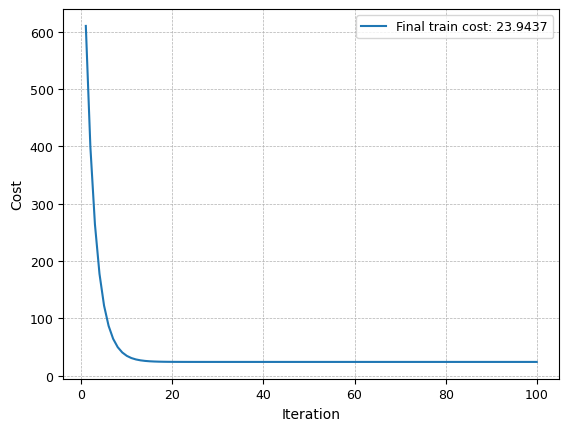

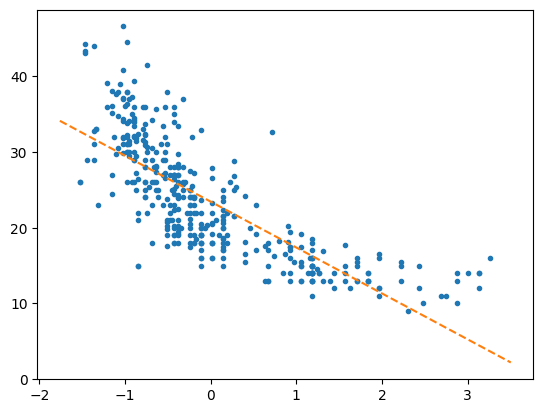

In [36]:
# Train the model with horsepower only as input
train_losses, weights, bias = train_model(x_train_norm[:,[2]],y_train,iterations=100,alpha=0.1)
training_curve_plot(train_losses)
# Plot the linear regression model together with the data
plt.plot(x_train_norm[:,2],y_train,'.')
abline(weights[0,0], bias[0])

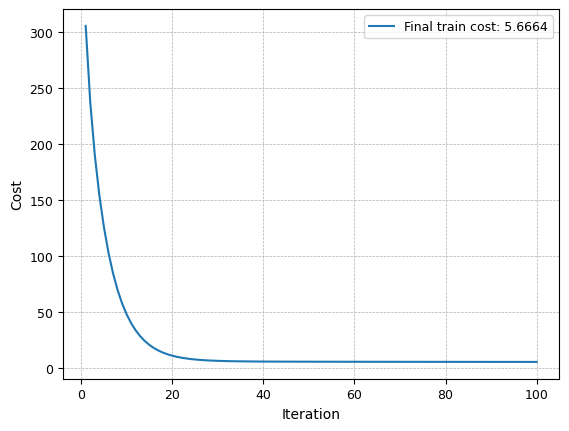

In [17]:
# Train the model with all features
train_costs, weights, bias = train_model(x_train_norm,y_train,iterations=100,alpha=0.1)
training_curve_plot(train_costs)

With a correct implementation, the final cost for the two models should be less than 25 and less than 12, respectively.

**TO DO:**  State the final loss for each model.

**TO DO:** To study the relationship between *learning rate* and *number of iterations*, try learning rates `[1, 1e-1, 1e-2, 1e-3, 1e-4]` for the two models. Provide a high level interpretation of what you observe evaluating these learning rates.

**TO DO:** Try repeating any of the previous experiments without normalizing the input. What happens then? Can you find a learning rate sch that we converge?